In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/블록체인

/content/gdrive/My Drive/블록체인


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
Train = pd.read_csv('./Data/Train001_ROSE_1.csv')
Test = pd.read_csv('./Data/Test001.csv')

In [ ]:
nRow, nCol = Train.shape
print(f'Train: There are {nRow} rows and {nCol} columns')

Train: There are 70957 rows and 12 columns


In [ ]:
nRow, nCol = Test.shape
print(f'Test: There are {nRow} rows and {nCol} columns')

Test: There are 58817 rows and 11 columns


<br>
<br>
<br>
<br>
<br>

# Normalization

In [ ]:
Train_X = Train.iloc[:,:10]
Train_Label = Train[['category']]
Train_Y = np.array(Train['category']).reshape(-1,1)

In [ ]:
Test_X = Test.iloc[:,:10]
Test_Label = Test[['category']]
Test_Y = np.array(Test['category']).reshape(-1,1)

In [ ]:
num_col = list(Train_X.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

stdenc = StandardScaler()
stdenc.fit(Train_X)
Train_X = stdenc.transform(Train_X)

labelenc = LabelEncoder()
labelenc.fit(Train_Y)
Train_Y = labelenc.transform(Train_Y)

# onehot = OneHotEncoder()
# onehot.fit(Train_Y)
# Train_Y = onehot.transform(Train_Y).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Train_X

array([[-0.10426042, -0.65259306,  0.33673665, ..., -0.0252137 ,
         0.81474686,  0.51140633],
       [ 0.78184016,  0.43078807,  0.68396623, ..., -0.0252137 ,
        -0.39010365,  0.51140633],
       [-0.81968354,  1.49623738,  0.24973302, ..., -0.0252137 ,
         0.81474686,  0.51140633],
       ...,
       [ 1.03039062, -1.06660582, -1.00420944, ..., -0.0252137 ,
        -1.78519371, -2.20631122],
       [ 1.05167227, -1.02360402, -1.00420944, ..., -0.0252137 ,
        -1.02423549, -2.58472759],
       [ 1.05184947, -1.02078828, -1.00420944, ..., -0.0252137 ,
        -1.02423549, -2.61912908]])

In [ ]:
Train_Y

array([0, 0, 1, ..., 2, 3, 3])

In [ ]:
Test_X = stdenc.transform(Test_X)

Test_Y = labelenc.transform(Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Test_X

array([[-1.37866436, -0.32652282,  1.01685515, ..., -0.0252137 ,
         0.81474686,  0.51140633],
       [ 1.0007389 ,  0.44274263,  1.21872033, ..., -0.0252137 ,
         0.81474686,  0.51140633],
       [-1.70885811, -0.86068622, -0.99947605, ..., -0.02502691,
         0.81474686,  0.51140633],
       ...,
       [ 1.03044885, -1.09664039, -1.00420944, ..., -0.0252137 ,
        -1.72178053, -2.65353057],
       [ 1.03022922, -1.11909222,  2.02655793, ..., -0.0252137 ,
        -2.16567282, -2.68793205],
       [ 1.03045634, -1.11905517,  1.99636538, ..., -0.0252137 ,
        -2.32420578, -2.79113652]])

In [ ]:
Test_Y

array([1, 0, 1, ..., 2, 2, 2])

# Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
def eval_Train(Train_Pred, Train_Label):
    Train_Pred_Label = pd.DataFrame(Train_Pred, columns=['category_pred'])
    Train_Pred_Label['category_pred'] = Train_Pred_Label['category_pred'].apply(lambda x: label_dict[x])

    print('Train Accuracy: ', accuracy_score(Train_Label, Train_Pred_Label))
    print('Recall (Macro)', recall_score(Train_Label, Train_Pred_Label, average='macro'))
    print('Precision (Macro)', precision_score(Train_Label, Train_Pred_Label, average='macro'))
    print('F1 score (Macro)', f1_score(Train_Label, Train_Pred_Label, average='macro'))
    print('\n')

    print(pd.crosstab(Train_Label['category'], Train_Pred_Label['category_pred']))

In [ ]:
def eval_Test(Test_Pred, Test_Label):
    Test_Pred_Label = pd.DataFrame(Test_Pred, columns=['category_pred'])
    Test_Pred_Label['category_pred'] = Test_Pred_Label['category_pred'].apply(lambda x: label_dict[x])

    print('Test Accuracy: ', accuracy_score(Test_Label, Test_Pred_Label))
    print('Recall (Macro)', recall_score(Test_Label, Test_Pred_Label, average='macro'))
    print('Precision (Macro)', precision_score(Test_Label, Test_Pred_Label, average='macro'))
    print('F1 score (Macro)', f1_score(Test_Label, Test_Pred_Label, average='macro'))
    print('\n')

    print(pd.crosstab(Test_Label['category'], Test_Pred_Label['category_pred']))

In [ ]:
Train_df = pd.concat([Train_Label, pd.DataFrame(Train_Y, columns = ['label'])], axis=1)
Train_df = Train_df.drop_duplicates()

In [ ]:
label_dict = {}
for i in range(Train_df.shape[0]):
    label_dict[Train_df.iloc[i,1]] = Train_df.iloc[i,0]

In [ ]:
label_dict

{0: 'DDoS', 1: 'DoS', 2: 'Normal', 3: 'Reconnaissance', 4: 'Theft'}

# ROSE + KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Train_X, Train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Train_Pred = knn.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9999154417464098
Recall (Macro) 0.9999556835807667
Precision (Macro) 0.9999068595939475
F1 score (Macro) 0.9999312636955697


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27072      5       1               0      0
DoS                 0  22617       0               0      0
Normal              0      0    4086               0      0
Reconnaissance      0      0       0           16448      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = knn.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9995749528197629
Recall (Macro) 0.9843732113036474
Precision (Macro) 0.9716855255386303
F1 score (Macro) 0.9777767461825719


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30824     11       1               0      0
DoS                 3  26406       0               0      0
Normal              0      0     107               0      0
Reconnaissance      2      0       6            1442      1
Theft               0      0       1               0     13


# ROSE + Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Train_X, Train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Train_Pred = dt.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27078      0       0               0      0
DoS                 0  22617       0               0      0
Normal              0      0    4086               0      0
Reconnaissance      0      0       0           16448      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = dt.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30836      0       0               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       0            1451      0
Theft               0      0       0               0     14


# ROSE + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(Train_X, Train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Train_Pred = rf.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27078      0       0               0      0
DoS                 0  22617       0               0      0
Normal              0      0    4086               0      0
Reconnaissance      0      0       0           16448      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = rf.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9999829981127906
Recall (Macro) 0.9999935140744585
Precision (Macro) 0.9981481481481481
F1 score (Macro) 0.9990665244265049


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30835      0       1               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       0            1451      0
Theft               0      0       0               0     14


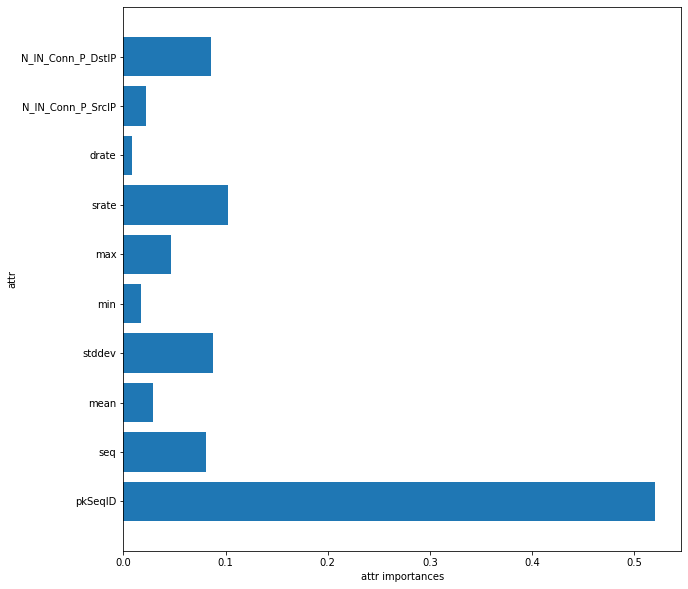

In [ ]:
def plot_feature_importances(model):
    
    n_features = Train_X.shape[1]
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), num_col)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()
    
plt.figure(figsize=(10, 10))
plot_feature_importances(rf)

# ROSE + XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(Train_X, Train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Train_Pred = xgb.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27078      0       0               0      0
DoS                 0  22617       0               0      0
Normal              0      0    4086               0      0
Reconnaissance      0      0       0           16448      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = xgb.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30836      0       0               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       0            1451      0
Theft               0      0       0               0     14


# ROSE + LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(Train_X, Train_Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
Train_Pred = lgbm.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27078      0       0               0      0
DoS                 0  22617       0               0      0
Normal              0      0    4086               0      0
Reconnaissance      0      0       0           16448      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = lgbm.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9999829981127906
Recall (Macro) 0.9998621640248105
Precision (Macro) 0.9981481481481481
F1 score (Macro) 0.9990008256976342


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30836      0       0               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       1            1450      0
Theft               0      0       0               0     14


# ROSE + Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(Train_X, Train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Train_Pred = nb.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.8875657088095608
Recall (Macro) 0.8024576884029824
Precision (Macro) 0.9335157077688756
F1 score (Macro) 0.8152409357582174


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            26430    648       0               0      0
DoS              4028  18589       0               0      0
Normal              0      0     906            3180      0
Reconnaissance    122      0       0           16326      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = nb.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9065916316711154
Recall (Macro) 0.7993745922147455
Precision (Macro) 0.9316297661780986
F1 score (Macro) 0.8216424622369309


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30119    717       0               0      0
DoS              4680  21729       0               0      0
Normal              0      1      22              84      0
Reconnaissance      9      0       3            1439      0
Theft               0      0       0               0     14


# ROSE + Naive Bayes with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

nb = GaussianNB()

cv_method = KFold(n_splits=5, shuffle=True)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_gs = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 scoring='accuracy',
                 cv=cv_method, 
                 verbose=1,
                 n_jobs=2)

nb_gs.fit(Train_X, Train_Y)

nb_gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 216 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    7.8s finished


{'var_smoothing': 1.232846739442066e-08}

In [ ]:
nb_gs = GaussianNB(var_smoothing=1.232846739442066e-08)
nb_gs.fit(Train_X, Train_Y)

GaussianNB(priors=None, var_smoothing=1.232846739442066e-08)

In [ ]:
Train_Pred = nb_gs.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.8978818157475654
Recall (Macro) 0.8089483254354338
Precision (Macro) 0.9408655828997228
F1 score (Macro) 0.8224926519086508


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            26996     82       0               0      0
DoS              3883  18734       0               0      0
Normal              0      0     927            3159      0
Reconnaissance    122      0       0           16326      0
Theft               0      0       0               0    728


In [ ]:
Test_Pred = nb_gs.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9202271452131187
Recall (Macro) 0.8043583888938365
Precision (Macro) 0.9459213484673719
F1 score (Macro) 0.8275946786119933


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30762     74       0               0      0
DoS              4518  21891       0               0      0
Normal              0      1      22              84      0
Reconnaissance     13      0       2            1436      0
Theft               0      0       0               0     14


# ROSE + ANN

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
ohenc.fit(Train_Y.reshape(-1, 1))
Train_Y_OH = ohenc.transform(Train_Y.reshape(-1, 1)).toarray()

In [ ]:
Train_Y_OH

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics


Input = tf.keras.layers.Input(shape=(Train_X.shape[1],)) # 32: 변수 개수, batch_shape=(self.batch_size, 34,) # keras reularizer뺀게 더 좋음!
hidden1 = tf.keras.layers.Dense(84, activation='relu')(Input)
hidden1 = tf.keras.layers.Dense(84, activation='relu')(Input)
Output = tf.keras.layers.Dense(5)(hidden1)

model = tf.keras.models.Model(Input, Output)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.losses.MeanSquaredError(), metrics = [metrics.mse, metrics.categorical_accuracy])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=2, mode='min')
model.fit(Train_X, Train_Y_OH, epochs = 20, batch_size=256, callbacks = [early_stopping])

Epoch 1/20
278/278 [==============================] - 3s 2ms/step - loss: 0.0638 - mean_squared_error: 0.0638 - categorical_accuracy: 0.8637
Epoch 2/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - categorical_accuracy: 0.9634
Epoch 3/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - categorical_accuracy: 0.9686
Epoch 4/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - categorical_accuracy: 0.9778
Epoch 5/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - categorical_accuracy: 0.9833
Epoch 6/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - categorical_accuracy: 0.9844
Epoch 7/20
278/278 [==============================] - 1s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - categorical_accuracy: 0.9843
Epoch 8/20
27

In [ ]:
Train_Pred = model.predict(Train_X)
Train_Pred = np.argmax(Train_Pred, axis = 1)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9922911058810265
Recall (Macro) 0.9127951216106316
Precision (Macro) 0.9830593265876356
F1 score (Macro) 0.9364995113960599


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            27046     29       3               0      0
DoS                 2  22615       0               0      0
Normal              0      0    4076              10      0
Reconnaissance      0      0     197           16251      0
Theft               0      0     111             195    422


In [ ]:
Test_Pred = model.predict(Test_X)
Test_Pred = np.argmax(Test_Pred, axis = 1)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.999115901865107
Recall (Macro) 0.9122765493145695
Precision (Macro) 0.9772580040844353
F1 score (Macro) 0.932457314599102


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30806     28       1               1      0
DoS                 3  26406       0               0      0
Normal              0      0     107               0      0
Reconnaissance      2      0      11            1438      0
Theft               0      0       1               5      8
